In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pathlib as pl
%matplotlib inline
sns.set()
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/Mackenzie/Ciencia de Dados/3 ETAPA/PROJETO APLICADO 2/A1/futebol (1).csv'


In [ ]:
import pandas as pd

data = pd.read_csv(file_path)


In [ ]:
path = pl.Path('/content/drive/My Drive/Mackenzie/Ciencia de Dados/3 ETAPA/PROJETO APLICADO 2/A1/futebol (1).csv')
futebol_df = pd.read_csv(path)
futebol_df.columns = futebol_df.columns.str.strip()  # Remove espaços nas colunas
futebol_df

,Data,Jogo,Minutos,Investimento,Odd,Ganho,Resultado
0,2022-07-01,Inglaterra x Israel,60 ao 70,10,1.57,5.7,Green
1,2022-07-01,Ayacucho x Cantolao,10 ao 20,10,1.50,5.0,Green
2,2022-07-01,Ayacucho x Cantolao,20 ao 30,10,1.50,5.0,Green
3,2022-07-01,"Lara x UCV AC. 0,5 GOLS",Gols,10,1.61,6.1,Red
4,2022-07-01,Guairena x Asuncion,20 ao 30,10,1.57,5.7,Green
...,...,...,...,...,...,...,...
1559,2022-10-31,Verona x Roma,Gols,10,4.33,33.3,Green
1560,2022-10-31,Elfsborg x Helsingborg,Gols,20,1.50,10.0,Red
1561,2022-10-31,Verona x Roma,Gols,10,1.50,5.0,Red
1562,2022-10-31,Midtjylland x Odense,Gols,10,1.50,5.0,Red


In [ ]:
futebol_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564 entries, 0 to 1563
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Data          1564 non-null   object 
 1   Jogo          1564 non-null   object 
 2   Minutos       1473 non-null   object 
 3   Investimento  1564 non-null   int64  
 4   Odd           1564 non-null   float64
 5   Ganho         1564 non-null   float64
 6   Resultado     1564 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 85.7+ KB


In [ ]:
futebol_df.Data = pd.to_datetime(futebol_df.Data)
futebol_df.Jogo = futebol_df.Jogo.str.strip().str.lower()
futebol_df.isnull().sum()


,0
Data,0
Jogo,0
Minutos,91
Investimento,0
Odd,0
Ganho,0
Resultado,0


In [ ]:
futebol_df.Minutos.value_counts(dropna=False)


,count
Minutos,
00 a 10,260
20 ao 30,194
60 ao 70,174
Gols,155
10 ao 20,147
20 a 30,129
10 a 20,103
60 a 70,95
NaN,91


In [ ]:
futebol_df.Minutos = futebol_df.Minutos.str.strip().str.lower()
futebol_df.Minutos = futebol_df.Minutos.str.replace('aos', 'a', regex=False)
futebol_df.Minutos = futebol_df.Minutos.str.replace('ao', 'a', regex=False)
futebol_df.Minutos = futebol_df.Minutos.str.replace('multipla', 'múltipla', regex=False)
futebol_df.Minutos = futebol_df.Minutos.str.replace('mult', 'múltipla', regex=False)
futebol_df.Minutos = futebol_df.Minutos.str.replace('a 30', 'temp', regex=False)
futebol_df.Minutos = futebol_df.Minutos.str.replace('20 temp', '20 a 30', regex=False)
futebol_df.Minutos = futebol_df.Minutos.str.replace('temp', '30 a 40', regex=False)
futebol_df.Minutos.fillna('desconhecido', inplace=True)
futebol_df.duplicated().sum()


<ipython-input-14-d43d26cdec3a>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  futebol_df.Minutos.fillna('desconhecido', inplace=True)


22

In [ ]:
futebol_df[futebol_df.duplicated()]


,Data,Jogo,Minutos,Investimento,Odd,Ganho,Resultado
412,2022-08-05,guarani x gremio,desconhecido,10,1.50,5.0,Green
431,2022-08-06,botafogo x ceará,desconhecido,10,1.50,5.0,Green
458,2022-08-07,danubio x maldonado,desconhecido,10,1.50,5.0,Green
670,2022-08-22,arg jrs x patronato,50 a 60,10,1.53,5.3,Green
752,2022-08-26,sagan tusu x fukuoka,20 a 30,10,1.66,6.6,Green
1214,2022-10-05,flamengo x inter,20 a 30,10,1.50,5.0,Green
1303,2022-10-11,copenhagen x city,20 a 30,10,1.57,5.7,Green
1306,2022-10-11,milan x chelsea,00 a 10,10,1.66,6.6,Green
1307,2022-10-11,psg x benfica,00 a 10,10,1.61,6.1,Green
1308,2022-10-11,dortmund x sevilla,20 a 30,10,1.61,6.1,Green


In [ ]:
futebol_df=futebol_df.groupby(list(futebol_df.columns), as_index=False).agg({'Investimento': 'sum', 'Ganho': 'sum'})
futebol_df.shape

(1542, 7)

In [ ]:
aux = futebol_df.Minutos.value_counts()
for kind in aux.index:
    if aux [kind] < 8:
        futebol_df.loc [futebol_df.Minutos == kind, "Minutos"] = "asiáticos"
futebol_df.Minutos = futebol_df.Minutos.str.replace('asiáticos', 'outros', regex=False)
futebol_df.nunique()

,0
Data,116
Jogo,1268
Minutos,11
Odd,34
Resultado,2
Investimento,7
Ganho,53


In [ ]:
futebol_df.Investimento.value_counts(normalize=True)


,proportion
Investimento,
10,0.861868
40,0.081712
20,0.039559
5,0.013619
25,0.001297
2,0.001297
80,0.000649


<Axes: xlabel='count', ylabel='Minutos'>

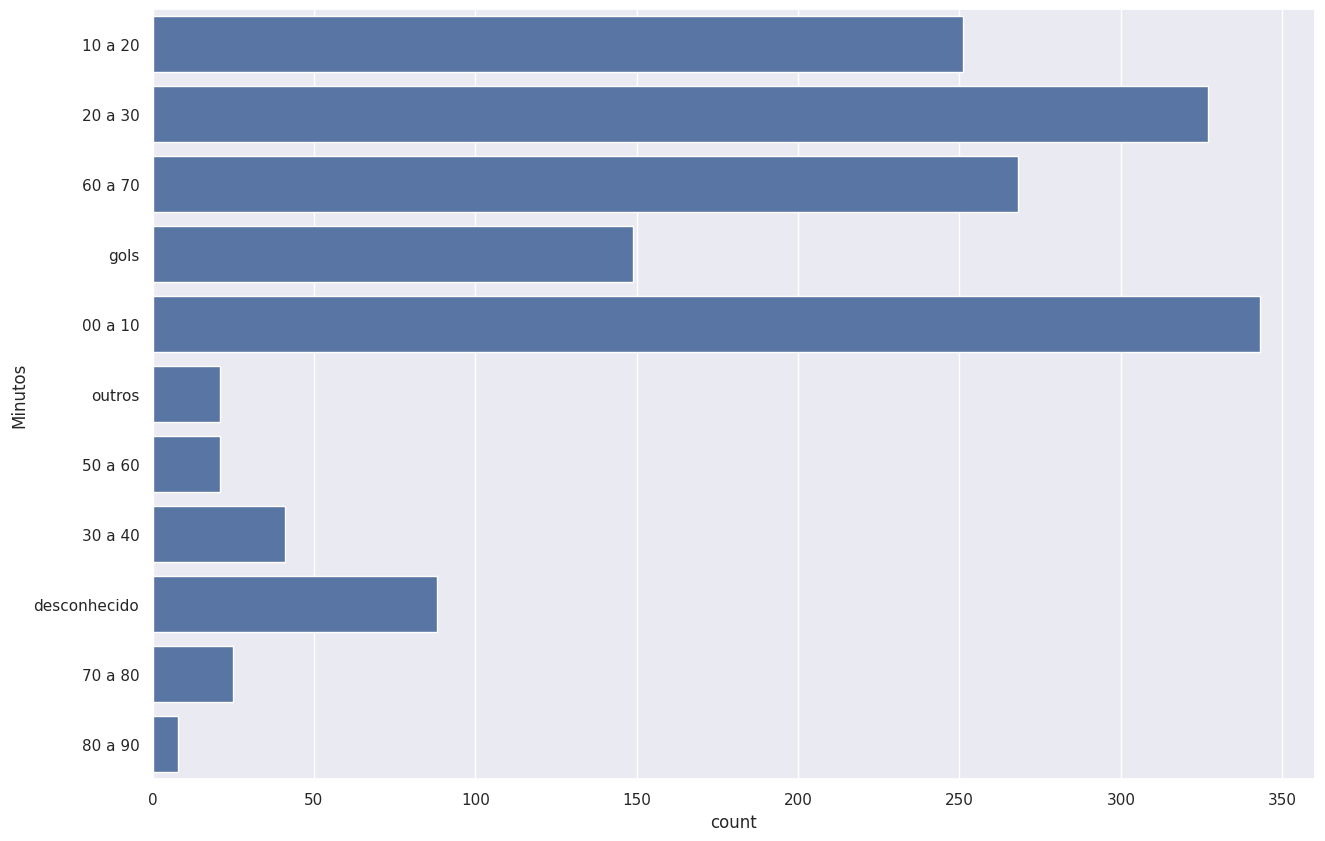

In [ ]:
plt.figure (figsize = (15,10))
sns.countplot(y='Minutos', data=futebol_df)

<Axes: xlabel='count', ylabel='Minutos'>

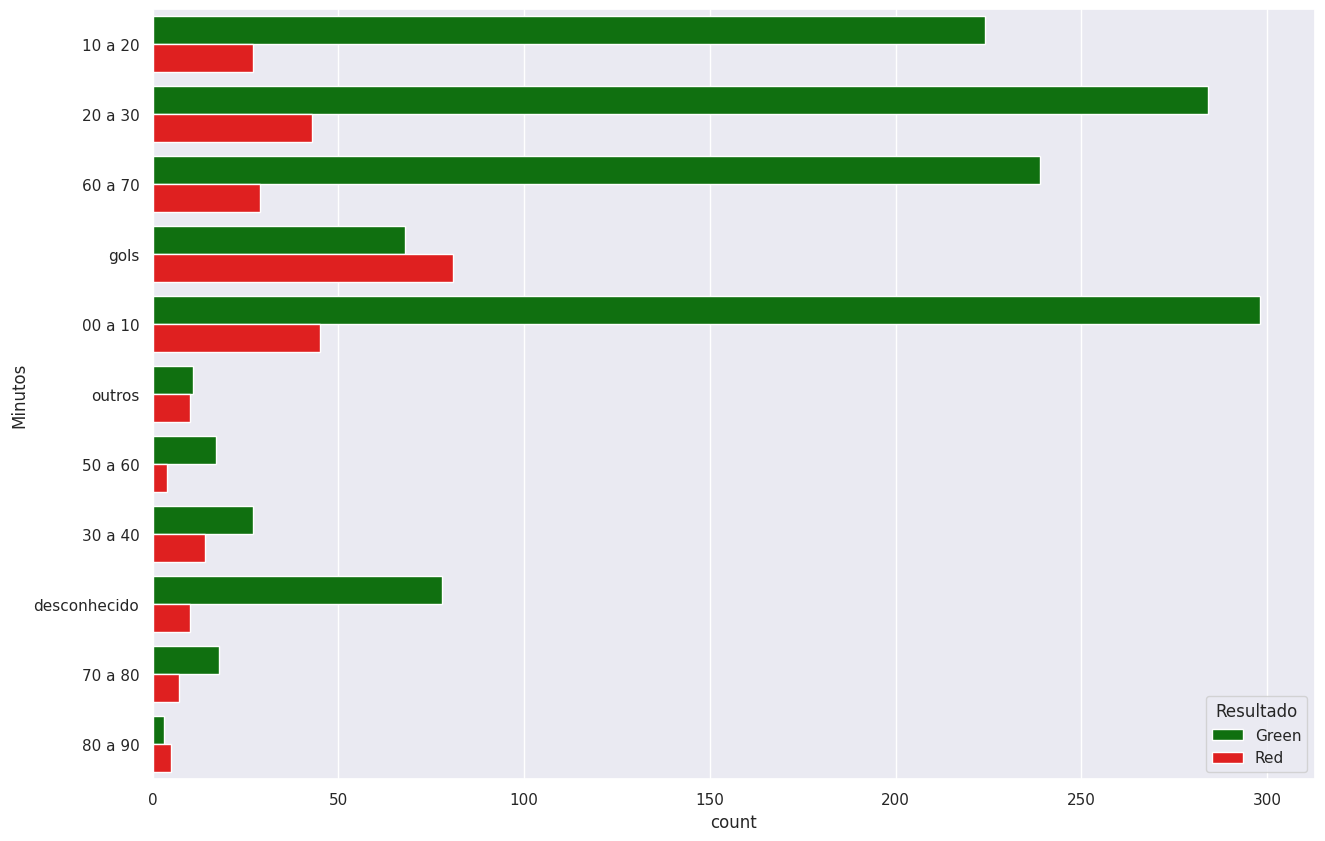

In [ ]:
colors = ['Green', 'Red']
plt.figure (figsize = (15,10))
sns.countplot(y='Minutos', hue='Resultado', data=futebol_df, palette=colors)

<Axes: xlabel='Data', ylabel='Count'>

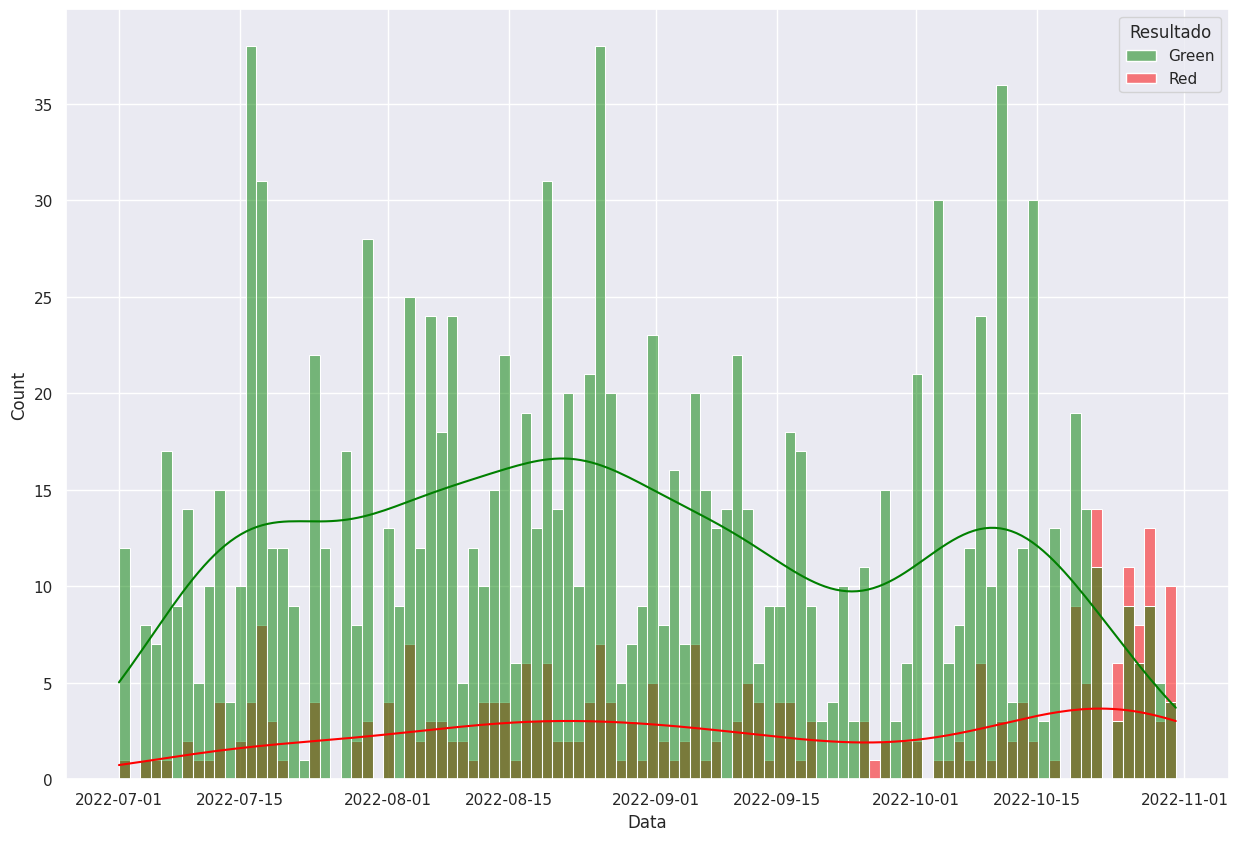

In [ ]:
plt.figure (figsize = (15,10))
sns.histplot(x='Data', hue='Resultado', data=futebol_df, bins=100, kde=True, palette=colors)

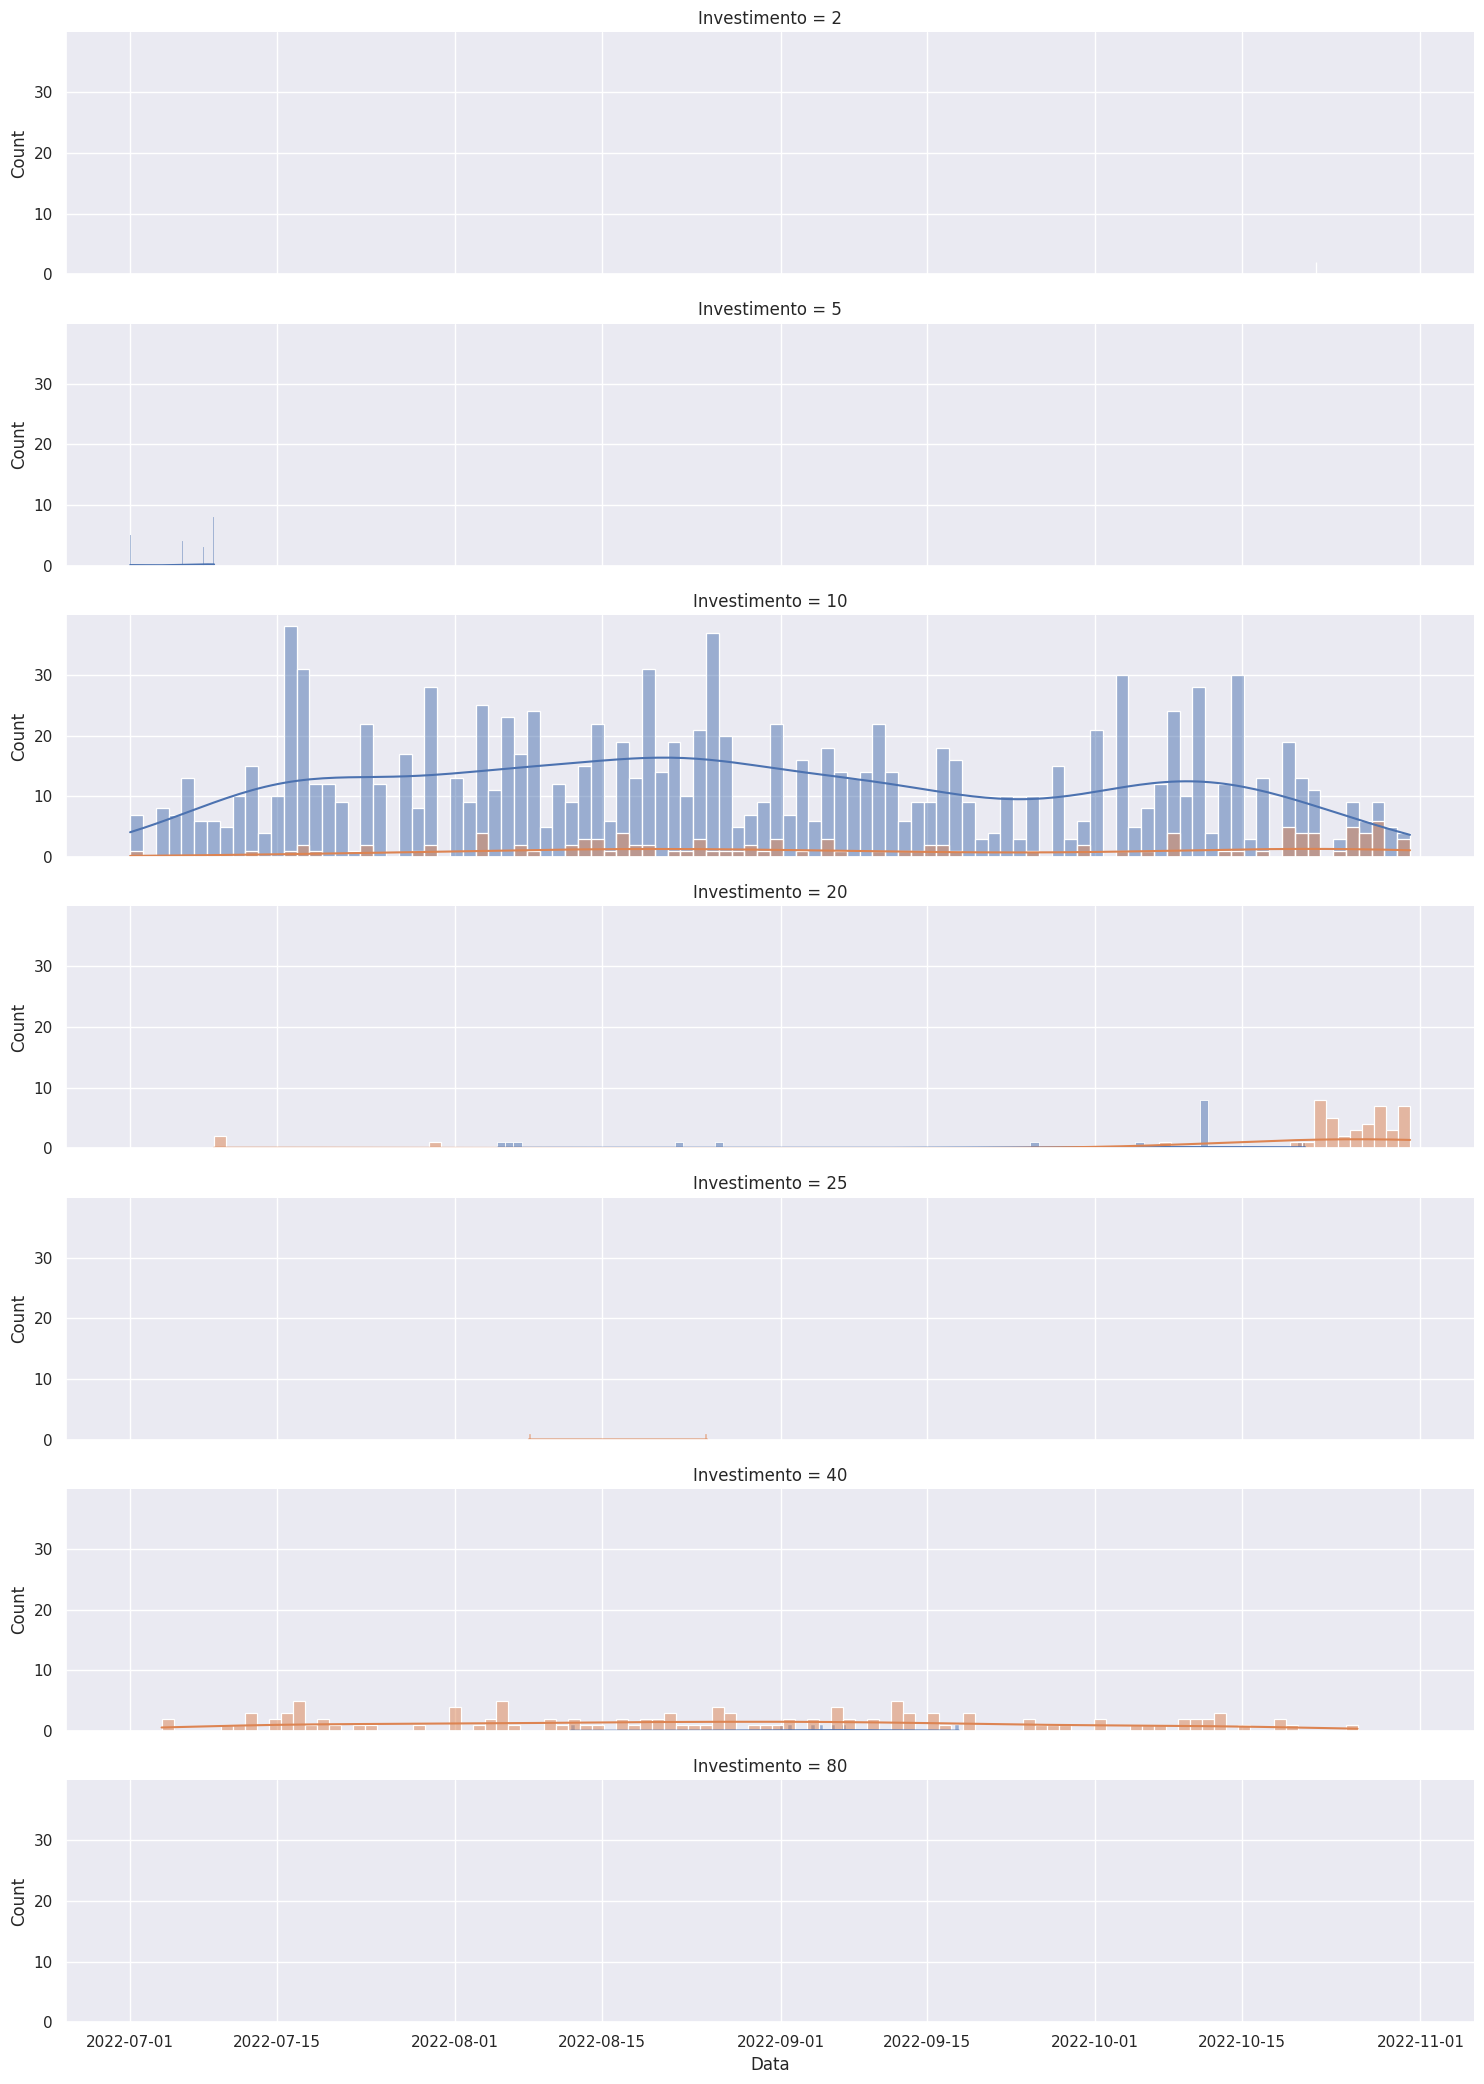

In [ ]:
g = sns.FacetGrid(futebol_df, row="Investimento", hue="Resultado", aspect=5)
g.map(sns.histplot, 'Data', kde=True, bins=100)

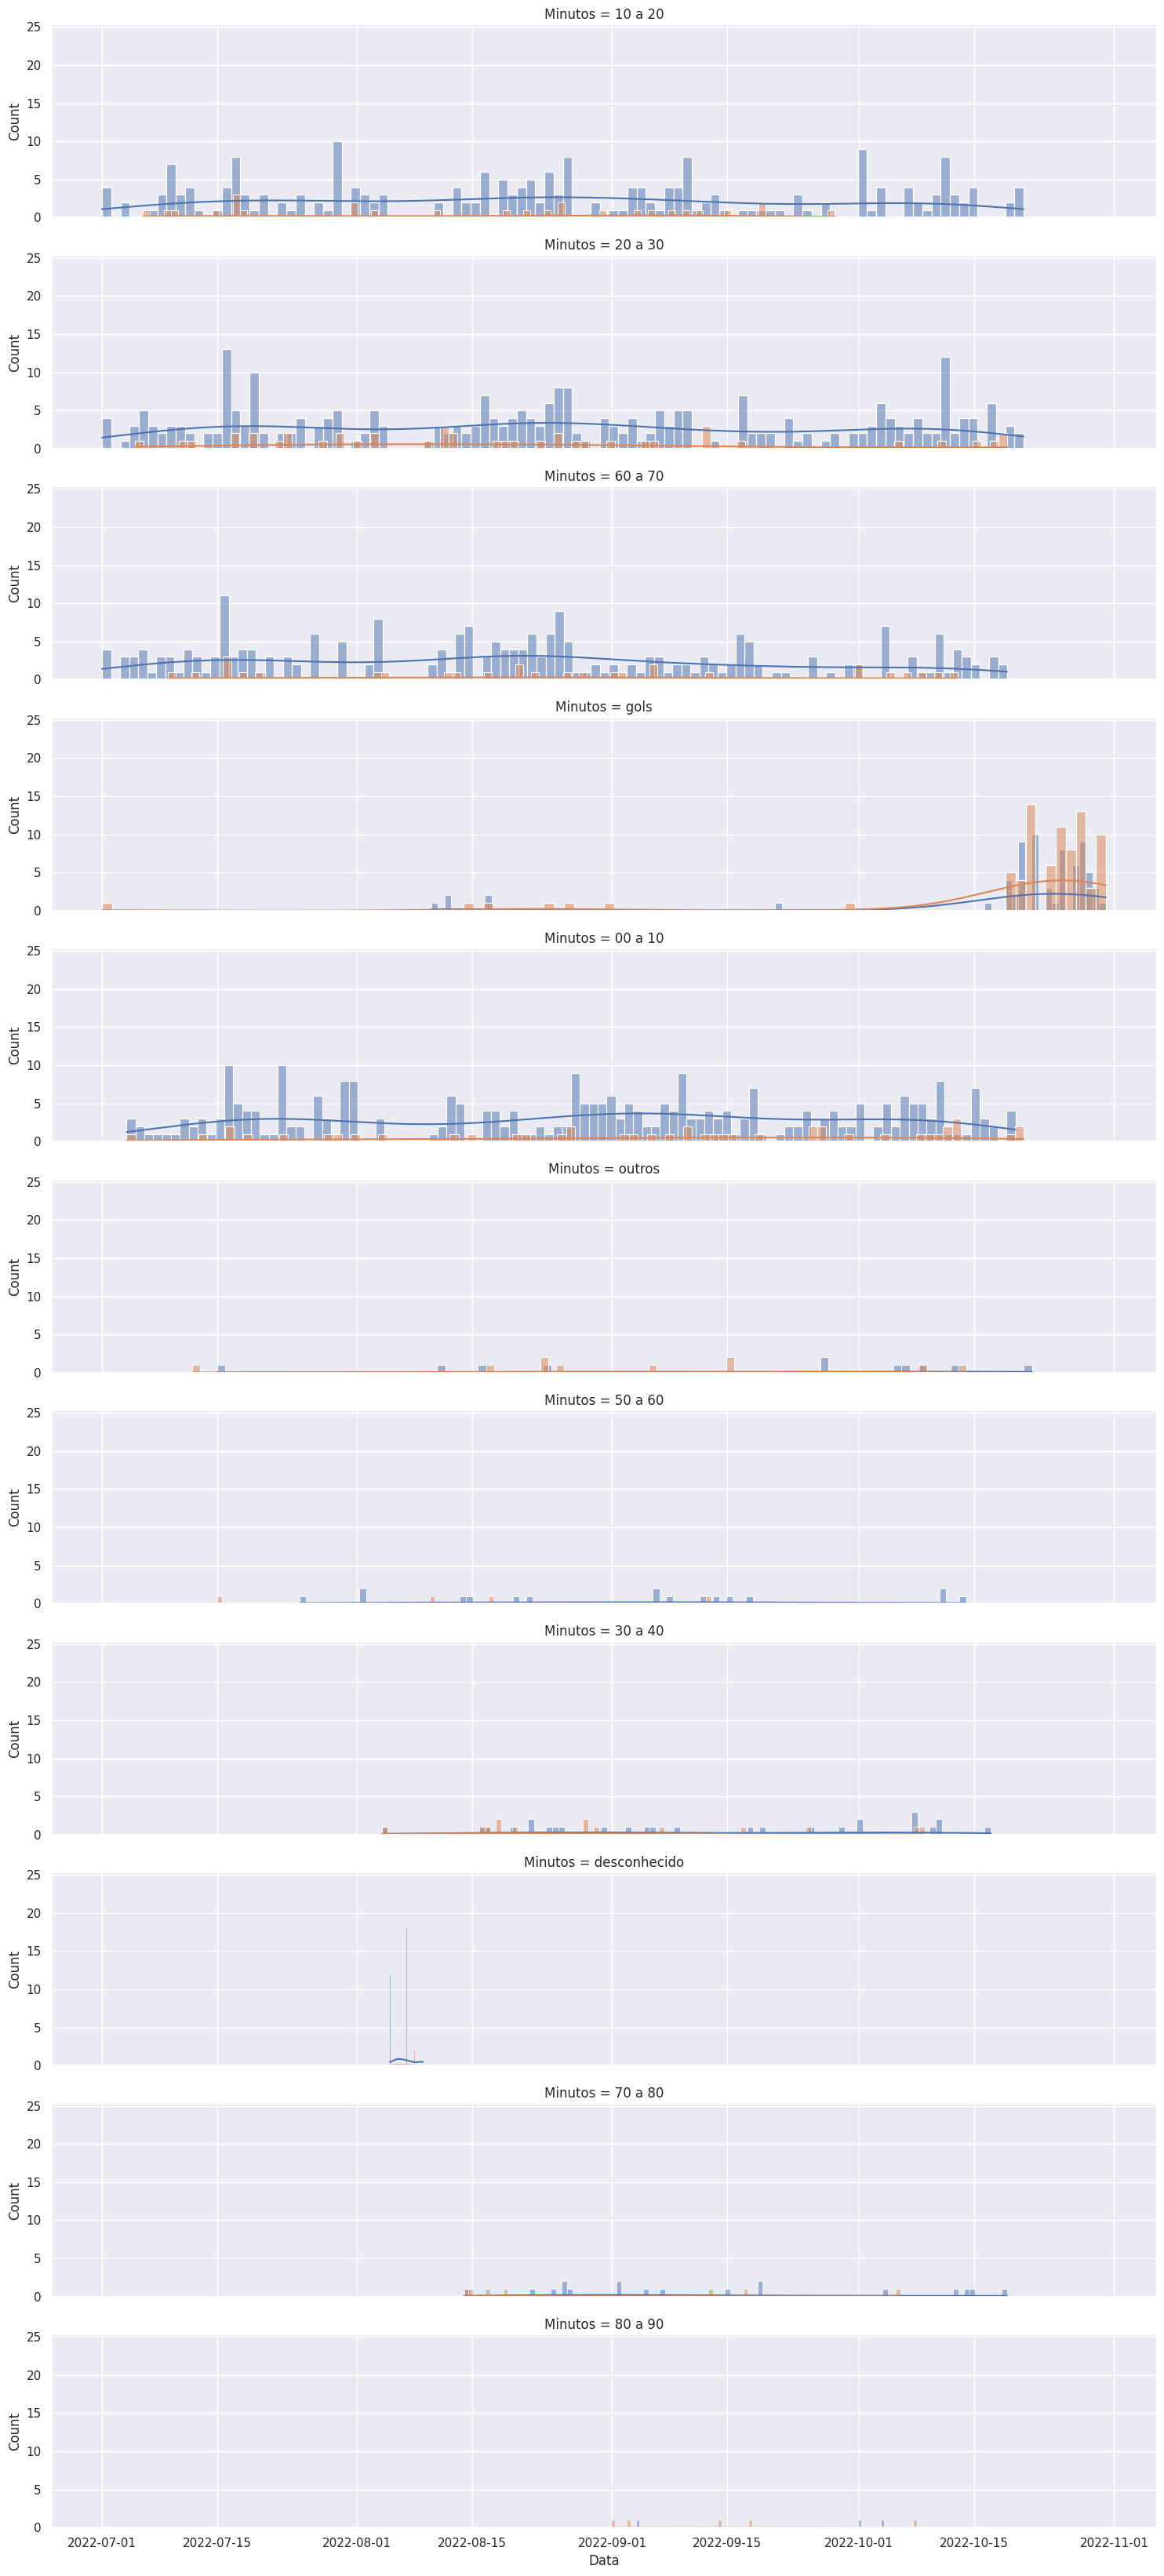

In [ ]:
g = sns.FacetGrid(futebol_df, row="Minutos", hue="Resultado", aspect=5)
g.map(sns.histplot, 'Data', kde=True, bins=100)